In [1]:
library(ggplot2)
library(gridExtra)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# Exercise 1

## Point 1

In [2]:
x <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

exp1 <- sum(x*p1)
exp2 <- sum(x*p2)
var1 <- sum(x^2*p1)-exp1**2
var2 <- sum(x^2*p2)-exp2**2


cat(paste('The expected value for the first method is: ', round(exp1, 3), '\n'))
cat(paste('The variance for the first method is: ', round(var1, 4), '\n'))
cat(paste('The expected value for the second method is: ', round(exp2,3), '\n'))
cat(paste('The variance for the second method is: ', round(var2, 4), '\n'))

The expected value for the first method is:  15.959 
The variance for the first method is:  0.034 
The expected value for the second method is:  15.962 
The variance for the second method is:  0.0282 


Plotting the two distributions

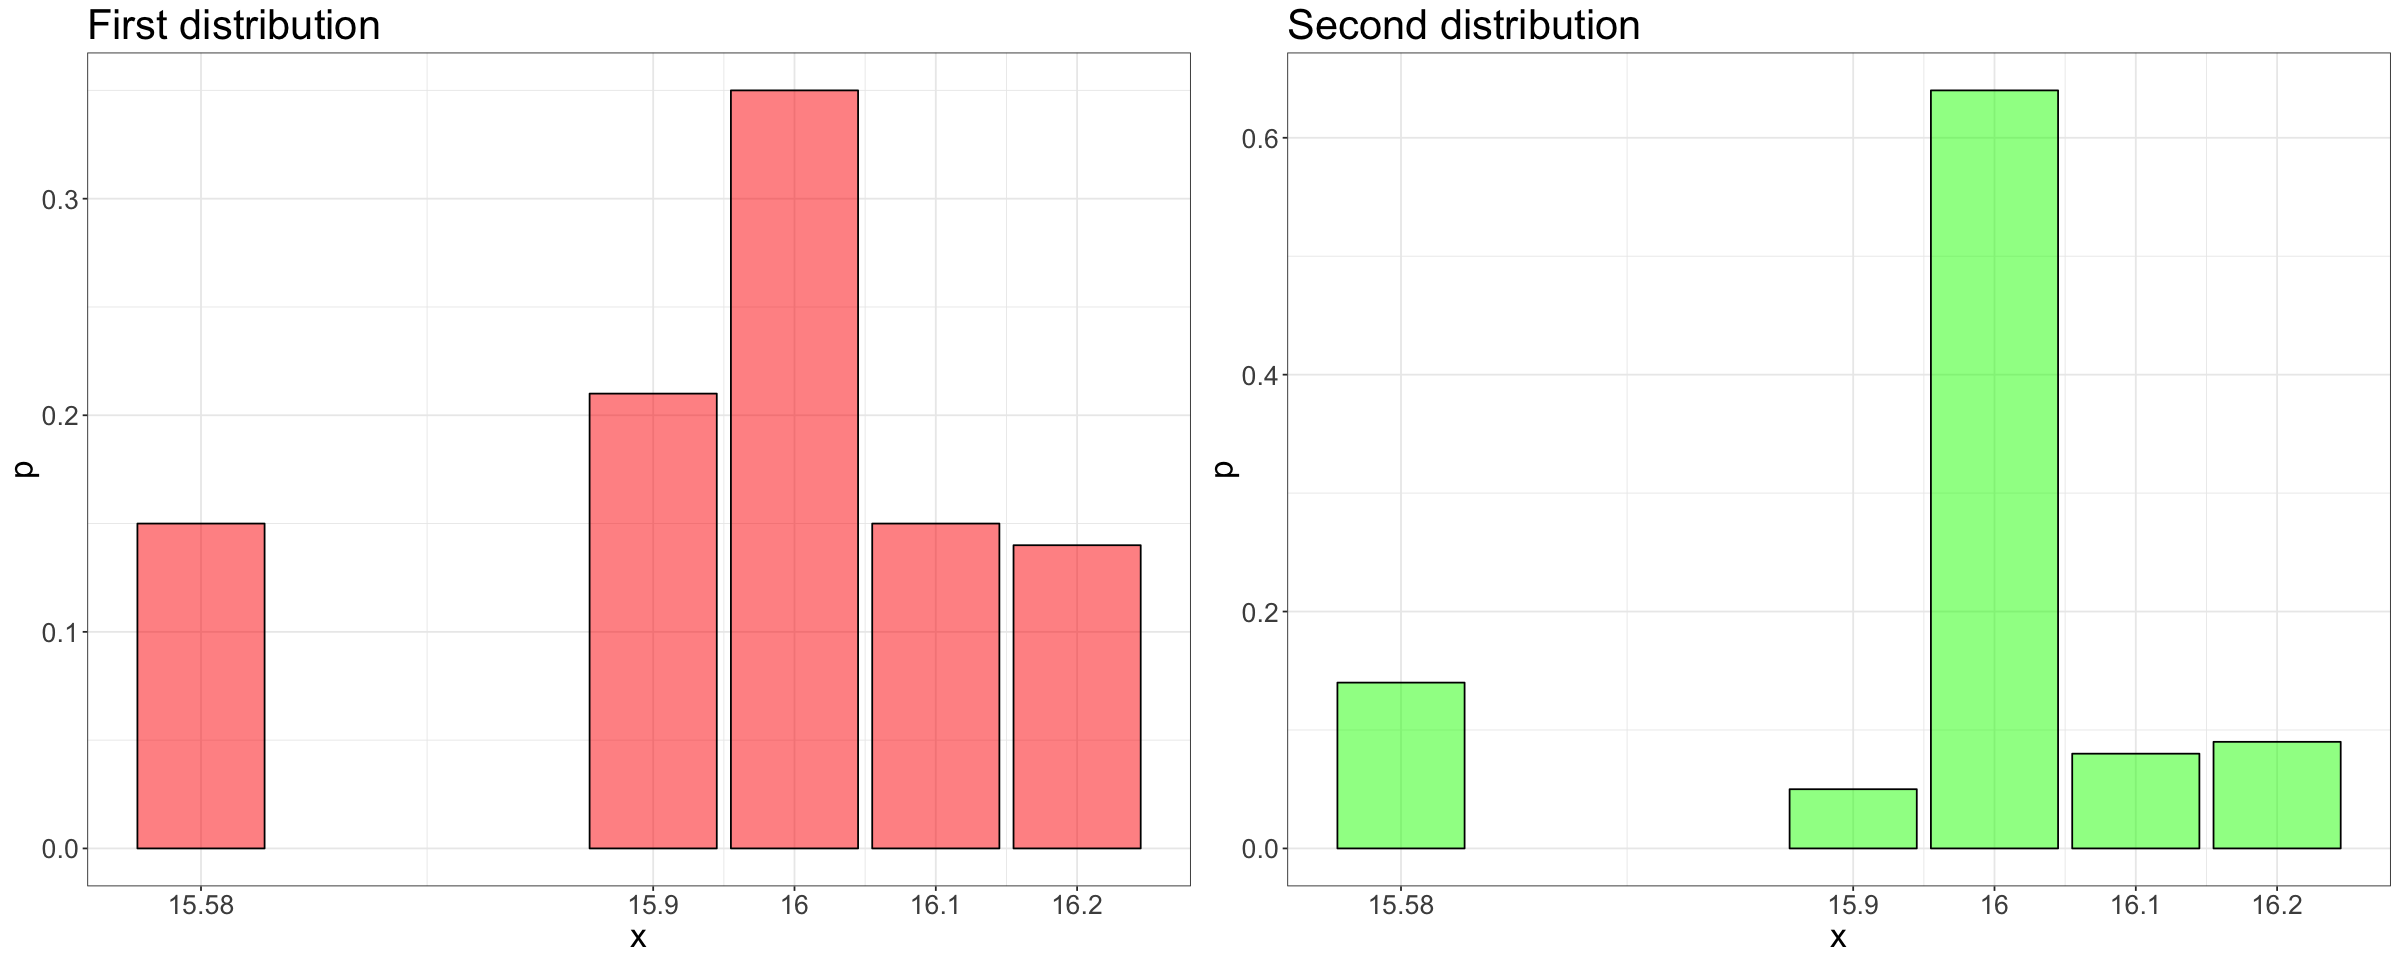

In [3]:
library(ggplot2)
options(repr.plot.width=20, repr.plot.height=8)
plot_1 <- ggplot() + 
          theme_bw() + 
          ggtitle('First distribution') + 
          ylab('p') + 
          xlab('x') + 
          theme(text = element_text(size=20)) +
          theme(plot.title = element_text(size=25)) +
          scale_x_continuous(breaks=x, labels=x) +
          geom_bar(aes(x=x, y=p1), stat='identity', fill='red', alpha=0.5, color = 'black')

plot_2 <- ggplot() + 
          theme_bw() + 
          ggtitle('Second distribution') + 
          ylab('p') + 
          xlab('x') + 
          theme(text = element_text(size=20)) +
          theme(plot.title = element_text(size=25)) +
          scale_x_continuous(breaks=x, labels=x) +
          geom_bar(aes(x=x, y=p2), stat='identity', fill='green', alpha=0.5, color = 'black')

grid.arrange(plot_1, plot_2, nrow=1)

# Exercise 2

## Point 1

In [4]:
waiting_times <- rexp(n=50, rate=1/30)

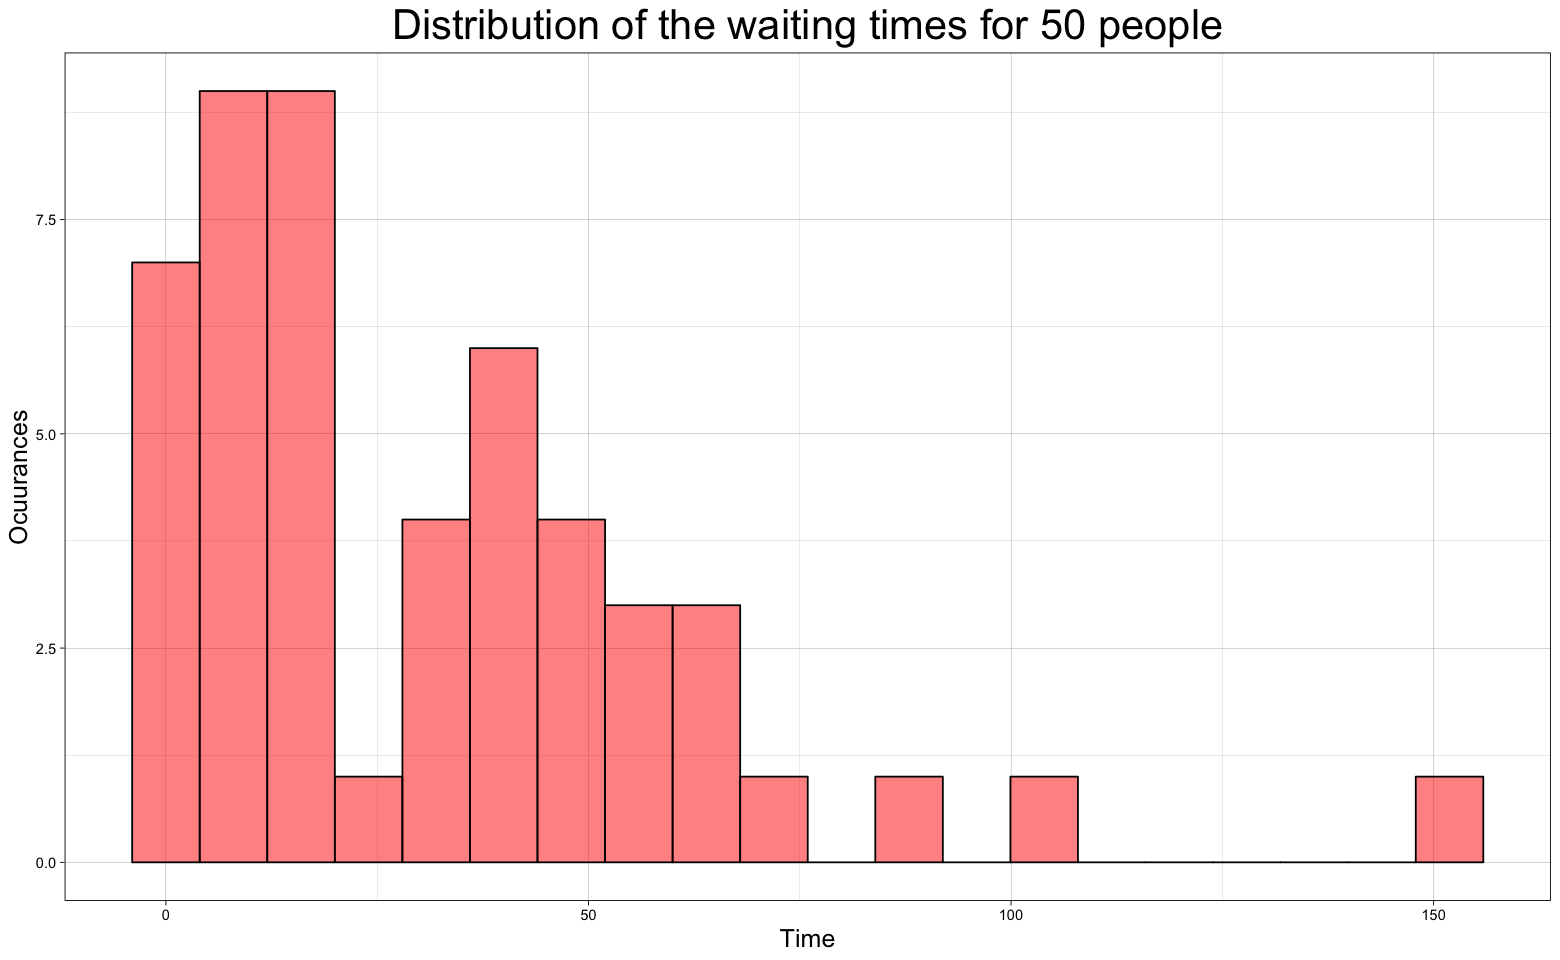

In [5]:
library(ggplot2)
options(repr.plot.width=13, repr.plot.height=8)
plot <- ggplot()
plot <- plot + theme_linedraw()
plot <- plot + ggtitle('Distribution of the waiting times for 50 people') + ylab('Ocuurances') + xlab('Time')
plot <- plot + theme(plot.title = element_text(size=25, hjust=0.5))
plot <- plot + theme(axis.title = element_text(size=15, hjust=0.5))
plot + geom_histogram(aes(x=waiting_times), color='black', fill='red', bins=20, alpha=0.5)


## Point 2

In [6]:
cumul <- pexp(q = 1:60, rate = 1/30)
cat(paste('The probability of waiting less than 10 minutes is', round(cumul[10],4)))

The probability of waiting less than 10 minutes is 0.2835

## Point 3

In [7]:
average <- mean(waiting_times)
cat(paste('The average for the simulated data is: ', round(average, 4), '\n'))
cat(paste('The accuracy with respect to the teoretical prevision is:', abs(round((average - 30)/30, 4))))


The average for the simulated data is:  31.2317 
The accuracy with respect to the teoretical prevision is: 0.0411

In [8]:
average_int <- integrate(function(x){x*dexp(x, rate = 1/30)}, lower = -Inf, upper = Inf)
cat('The expected value computed integrating is: ' ,average_int[['value']], '\n')
cat(paste('The accuracy with respect to the teoretical prevision is:', (abs(average_int[['value']] - 30))/30))

The expected value computed integrating is:  30 
The accuracy with respect to the teoretical prevision is: 2.05903442444348e-12

In [9]:
cat('We see that the accuracy is not exactly 0 because in reality the exact value returned by the integral is:\n') 
average_int$value

We see that the accuracy is not exactly 0 because in reality the exact value returned by the integral is:


[1] 30

In [10]:
cat(paste('The probability of waiting more than one hour is:', round(1-cumul[60],4)))

The probability of waiting more than one hour is: 0.1353

# Exercise 3

In [11]:
distr <- dpois(x=0:10, lambda=1/3)


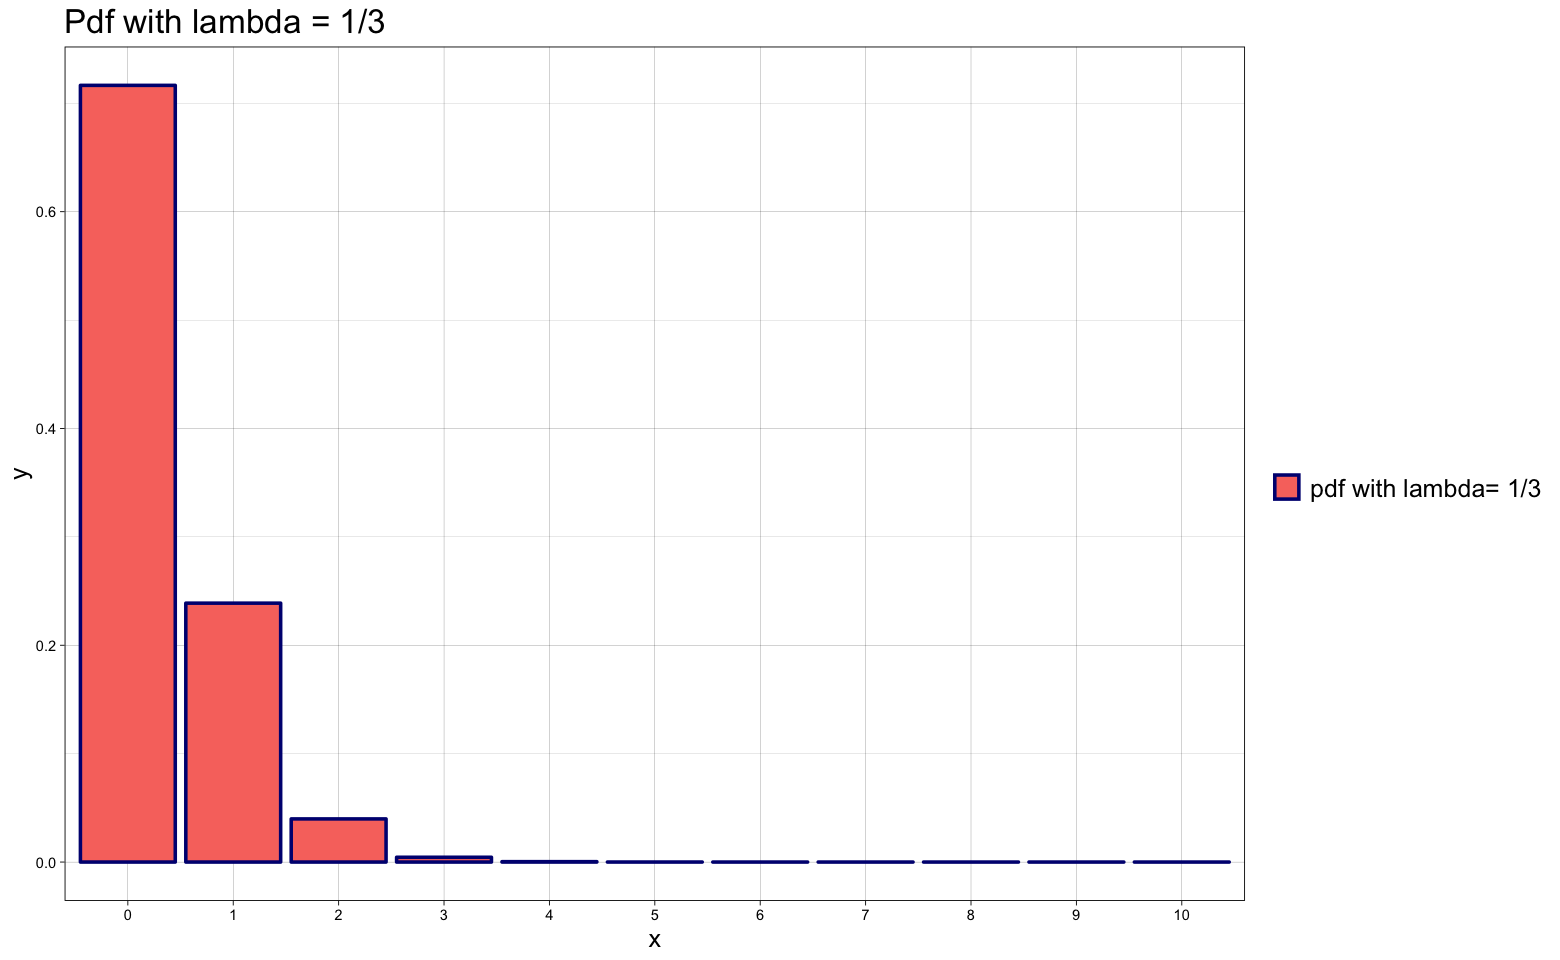

In [12]:
#plot <- ggplot(oil_prices, aes(x=Year, y=Oil))
data_1 <- data.frame((0:10), distr)
colnames(data_1) <- c('x_1', 'y_1')
plot <- ggplot(data_1, aes(x=factor(x_1), y=y_1, fill='pdf with lambda= 1/3'))
plot <- plot + ggtitle('Pdf with lambda = 1/3') + ylab('y') + xlab('x')
plot <- plot + theme_linedraw()
plot <- plot + guides(fill=guide_legend(title=""))
plot <- plot + theme(legend.text=element_text(size=15))
plot <- plot + theme(plot.title = element_text(size=20))
plot <- plot + theme(axis.title = element_text(size=15))
plot <- plot + scale_x_discrete(breaks=0:10, labels=0:10)
plot + geom_bar(stat='identity', color='navy', size=1)

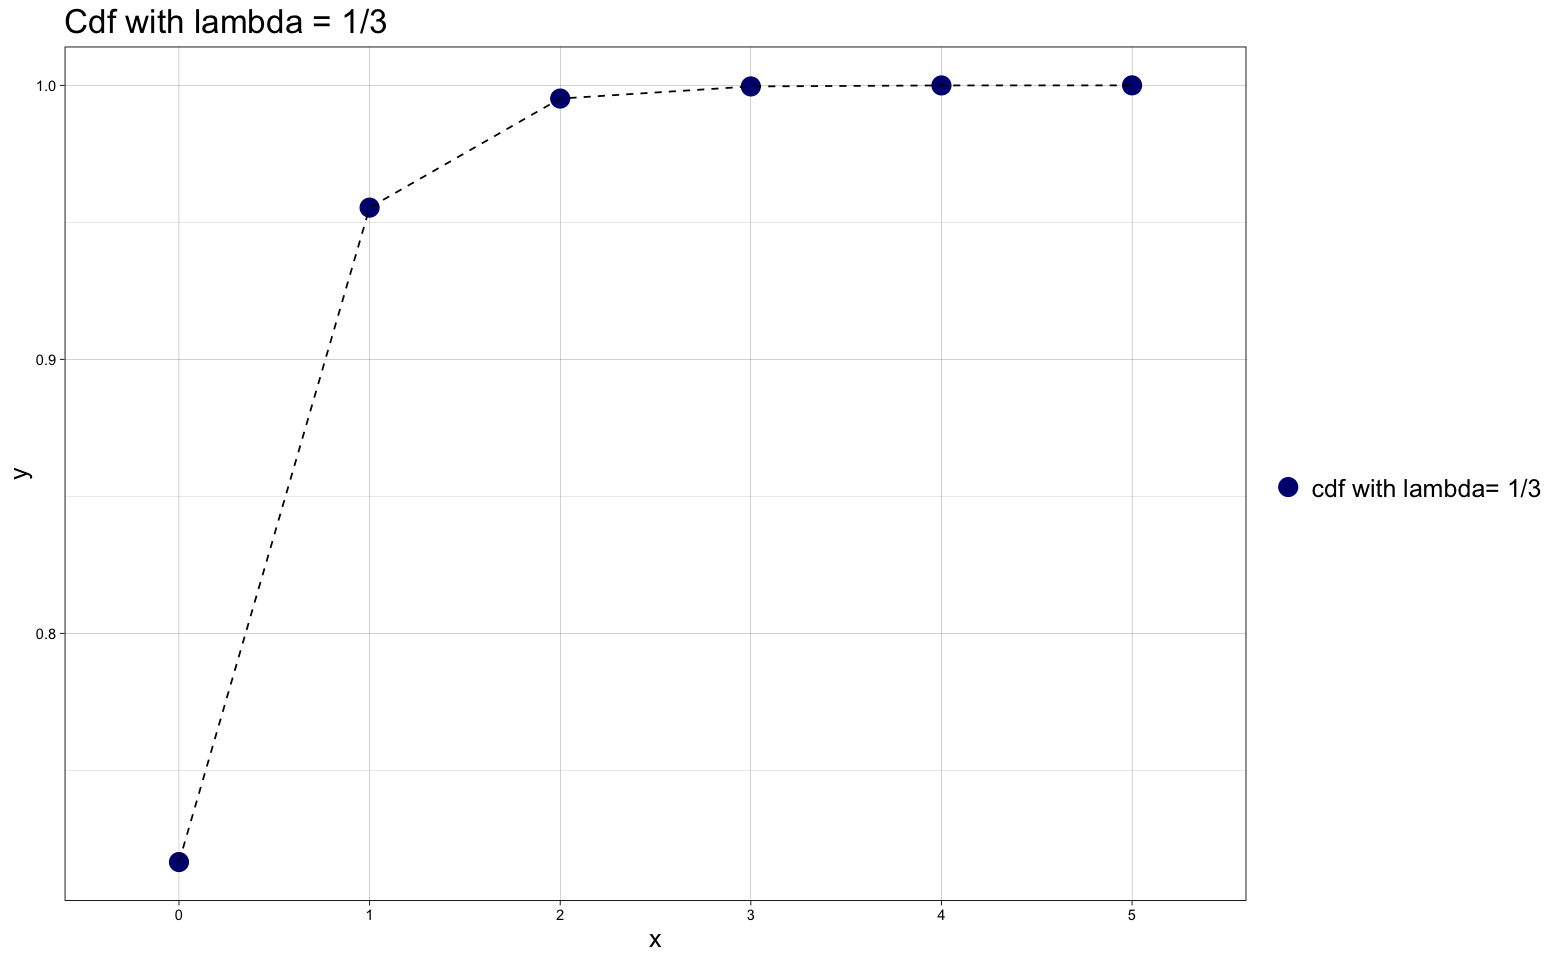

In [13]:
cumul <- ppois(q=0:5, lambda=1/3)

#plot <- ggplot(oil_prices, aes(x=Year, y=Oil))
data_2 <- data.frame((0:5), cumul)
colnames(data_2) <- c('x_2', 'y_2')

plot <- ggplot(data_2, aes(x=factor(x_2), y=y_2, fill='cdf with lambda= 1/3'))
plot <- plot + theme_linedraw()
plot <- plot + theme(legend.text=element_text(size=15))
plot <- plot + guides(fill=guide_legend(title=""))
plot <- plot + ggtitle('Cdf with lambda = 1/3') + ylab('y') + xlab('x')
plot <- plot + theme(legend.text=element_text(size=15))
plot <- plot + theme(plot.title = element_text(size=20))
plot <- plot + theme(axis.title = element_text(size=15))
plot <- plot + scale_x_discrete(breaks=0:5, labels=0:5)
plot + geom_point(stat='identity', color='navy', size=5) + geom_line(aes(x=1:6, y=cumul), linetype='dashed')

In [14]:
cat(paste('The probability to have at least one error on a specific page is:', round(1-distr[1],4), '%'))

The probability to have at least one error on a specific page is: 0.2835 %

# Exercise 4

Solving with a binomial

In [15]:
prob <- dbinom(x=0, size=9, prob=2/26)
cat(paste('The probability of needing at least 10 draws is: ', round(prob,4)))


The probability of needing at least 10 draws is:  0.4866

Solving with the geometric

In [16]:
prob <- 1 - pgeom(q=8, prob=2/26)
cat(paste('The probability of needing at least 10 draws is: ', round(prob,4)))

The probability of needing at least 10 draws is:  0.4866

Solving with negative binomial

In [17]:
prob <- 1 - pnbinom(q=8, size = 1, prob=2/26)
cat(paste('The probability of needing at least 10 draws is: ', round(prob,4)))

The probability of needing at least 10 draws is:  0.4866

# Exercise 5

## Point 1

In [18]:
func <- function(t){(t-1)*(2-t)}
integral <- integrate(func, lower= 1, upper= 2)

cat(paste('The constant c that correctly normalizes the integral is: ', 1/(integral$value), '\n\n'))
cat('The analytical form of the integral is F(t) = -(t^3)/3 + 3/2*t^2 -2t,
F(2)-F(1)=1/6 in agreement with our constant')

The constant c that correctly normalizes the integral is:  6 

The analytical form of the integral is F(t) = -(t^3)/3 + 3/2*t^2 -2t,
F(2)-F(1)=1/6 in agreement with our constant

## Point 2

In [19]:
dcustom <- function(t){
    distr <- ifelse(t > 1 & t < 2, 
                    6*(t-1)*(2-t),
                    0)
    return(distr)
    
}

In [20]:
pcustom <- function(t){
    cumul <- ifelse(t > 1 & t <= 2,
                    -2*(t^3) + 9*t^2 -12*t + 5,
                    0)
    return(cumul)
}

In [21]:
inverse <- function(f, lower=1, upper=2){
  function(y){
    uniroot(function(x){f(x) - y}, lower = lower, upper = upper)$root
  }
}

gen_quantile <- function(y, cdf, lower.value=1, upper.value=2){
  output <- numeric(length(y))
  for (i in seq_along(y)){
    if (y[i]==1) output[i]<-upper.value       
    else if (y[i]==0) output[i]<-lower.value  
    else output[i] <- inverse(cdf)(y[i])
  }
  return(output)
}

In [22]:
q_custom <- function(y){gen_quantile(y, pcustom)}



In [23]:

r_custom <- function(n){
  q_custom(runif(n))
}

In [24]:
#Axis for the plot
x_axis <- seq(1, 2, length = 20)


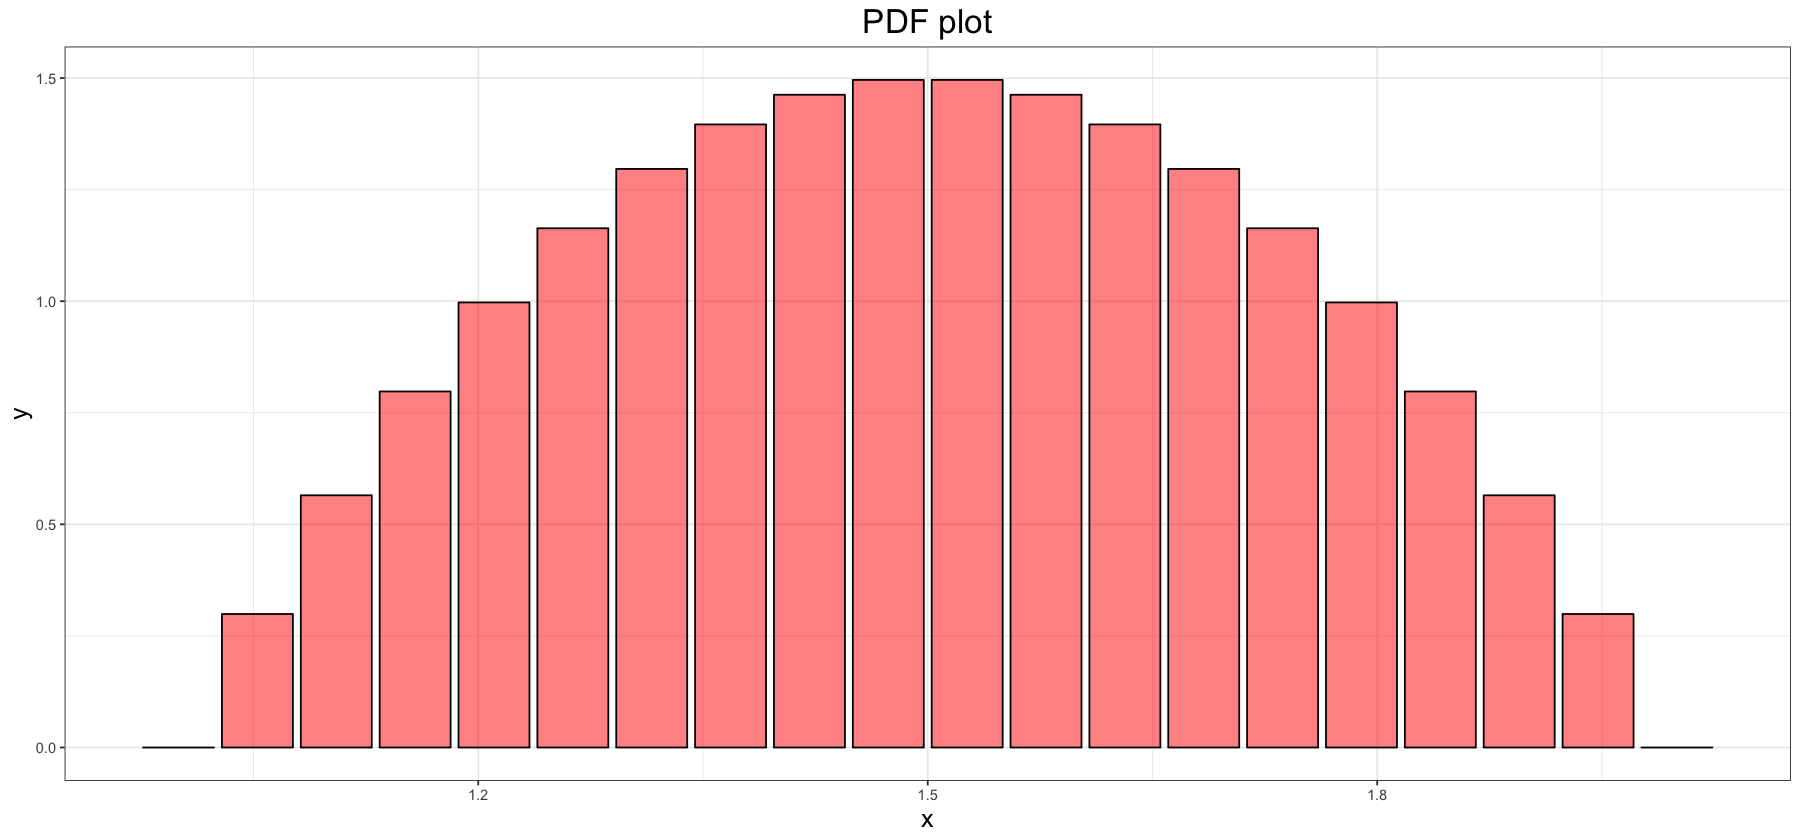

In [25]:
options(repr.plot.width=15, repr.plot.height=7)

plot <- ggplot()
plot <- plot + theme_bw()
plot <- plot + ggtitle('PDF plot') + ylab('y') + xlab('x')
plot <- plot + theme(plot.title = element_text(size=20, hjust=0.5))
plot <- plot + theme(axis.title = element_text(size=15, hjust=0.5))
plot + geom_bar(aes(x_axis, dcustom(x_axis)), stat='identity', fill='red', alpha=0.5, color='black')

**Superimposing the analytical distribution to n sampled points to verify the definition of the sampling function**

Warning message:
“Removed 2 rows containing missing values (geom_bar).”

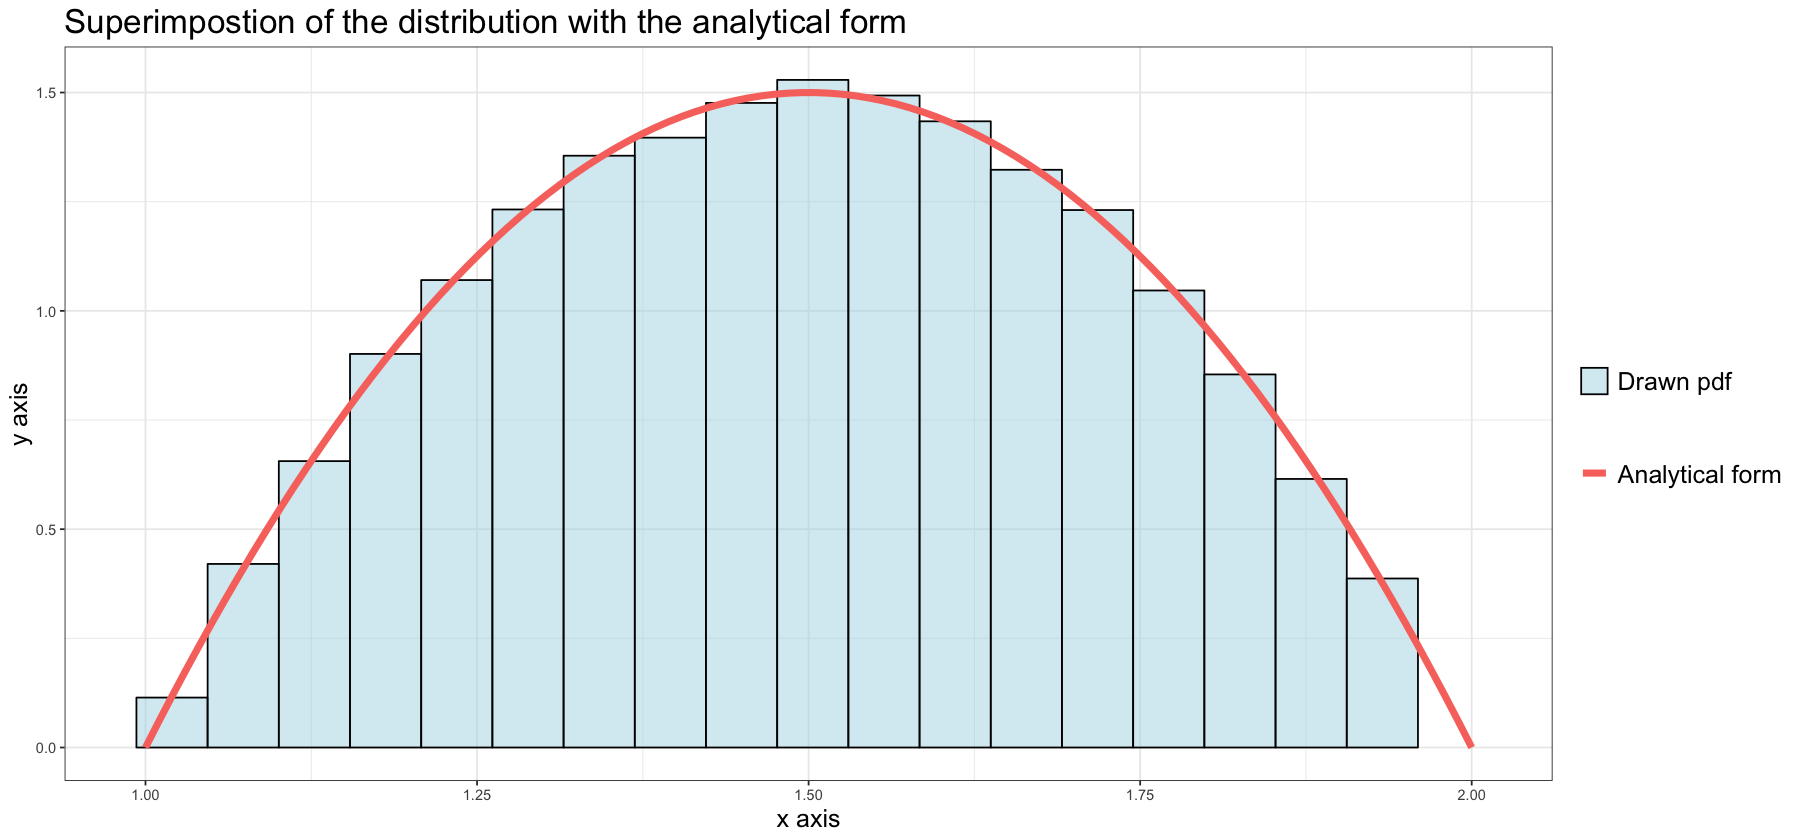

In [26]:
n_samples <- 10^5
samples <- r_custom(0:n_samples)
x_axis <- seq(1, 2, length= 100)
imp_plot <- ggplot() +
            geom_histogram(aes(x=samples,y=..density.., fill = 'Drawn pdf'), bins=20,  alpha=0.5, color='black') +
            scale_fill_manual(values = "lightblue", name = "") + 
            xlim(0.99, 2.01) +
            ggtitle('Superimpostion of the distribution with the analytical form') +
            ylab('y axis') +
            xlab('x axis') +
            theme_bw() +
            theme(axis.title = element_text(size=15)) +
            theme(plot.title = element_text(size=20)) +
            # The 6 is the constant to miltiply for a proper normalization
            geom_line(aes(x=x_axis, y= 6*func(x_axis), color='Analytical form'), lwd=2) +
            theme(legend.text=element_text(size=15)) + 
            labs(colour = "")
            
imp_plot



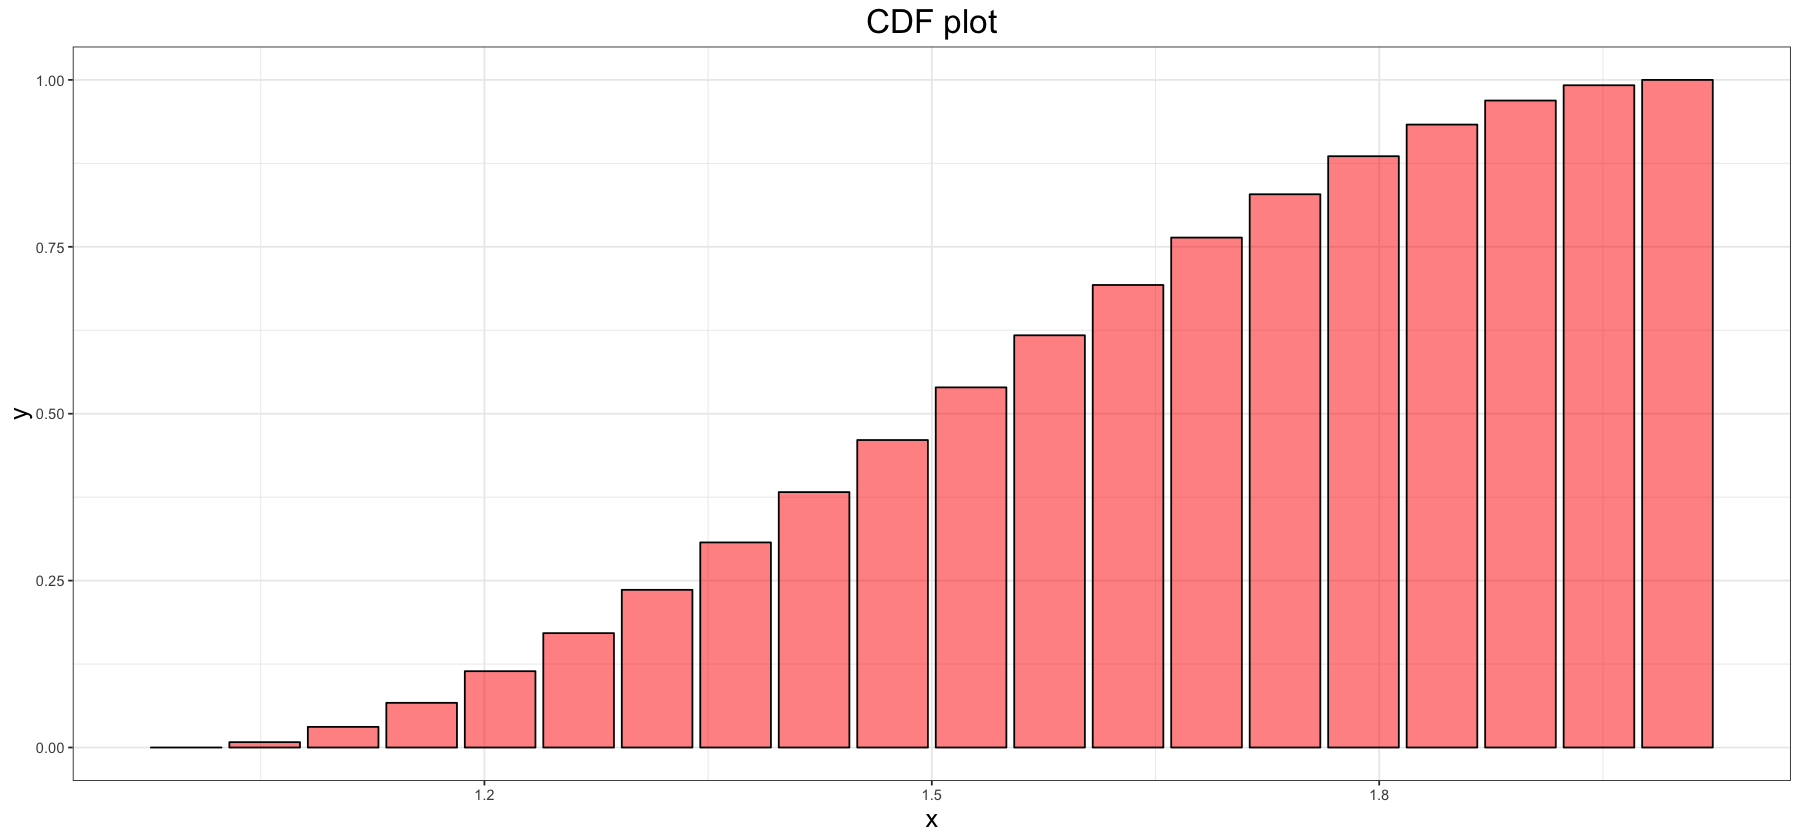

In [27]:
# options(repr.plot.width=15, repr.plot.height=7)
x_axis <- seq(1, 2, length = 20)
plot <- ggplot()
plot <- plot + theme_bw()
plot <- plot + ggtitle('CDF plot') + ylab('y') + xlab('x')
plot <- plot + theme(plot.title = element_text(size=20, hjust=0.5))
plot <- plot + theme(axis.title = element_text(size=15, hjust=0.5))
plot + geom_bar(aes(x_axis, pcustom(x_axis)), stat='identity', fill='red', alpha=0.5, color='black')


## Point 3

In [28]:
est1 <- integrate(dcustom, lower = 75/60, upper=2)
est_2 <- integrate(dcustom, lower = 90/60, upper=2)

In [29]:

cat('The probability that the test takes more then 75 minutes is: ', round(est1$value, 4), '\n\n')
cat('The probability that the test takes exactly 90 minutes is: ', 0, 
    '\nbecause it\'s a single point in a continous distribution\n\n')
cat('The probability that the test takes exactly 120 minutes is: ', 0, 
    '\nbecause it\'s a single point in a continous distribution\n\n')
cat('The probability that it will take between 90 and 120 minutes is ', est_2$value)

The probability that the test takes more then 75 minutes is:  0.8437 

The probability that the test takes exactly 90 minutes is:  0 
because it's a single point in a continous distribution

The probability that the test takes exactly 120 minutes is:  0 
because it's a single point in a continous distribution

The probability that it will take between 90 and 120 minutes is  0.5

# Exercise 6

In [30]:
func_2 <- function(x){
    ifelse(
    x > 1 & x < 2,
    2/x^2,
    0)
}

In [31]:
# Checking the normalization
integral_2 <- integrate(func_2, lower= 1, upper= 2)
integral_2

1 with absolute error < 1.1e-14

In [32]:
dcustom_2 <- function(x){
    distr <- ifelse(x > 1 & x < 2, 
                    2/x^2,
                    0)
    return(distr)
    
}

In [33]:
pcustom_2 <- function(x){
    cumul <- ifelse(x > 1 & x < 2,
                    -2/x + 2 ,
                    0)
    return(cumul)
}

In [34]:
rcustom_2 <- function(n){
    us <- runif(n)
    samp <- ifelse(us > 0 & us < 1,
                    -2/(us-2) ,
                    0)
    return(samp)
}

In [35]:
qcustom_2 <- function(p){
    q_2 <- ifelse(p > 0 & p < 1,
                    -2/(p-2) ,
                    0)
    return(q_2)
}

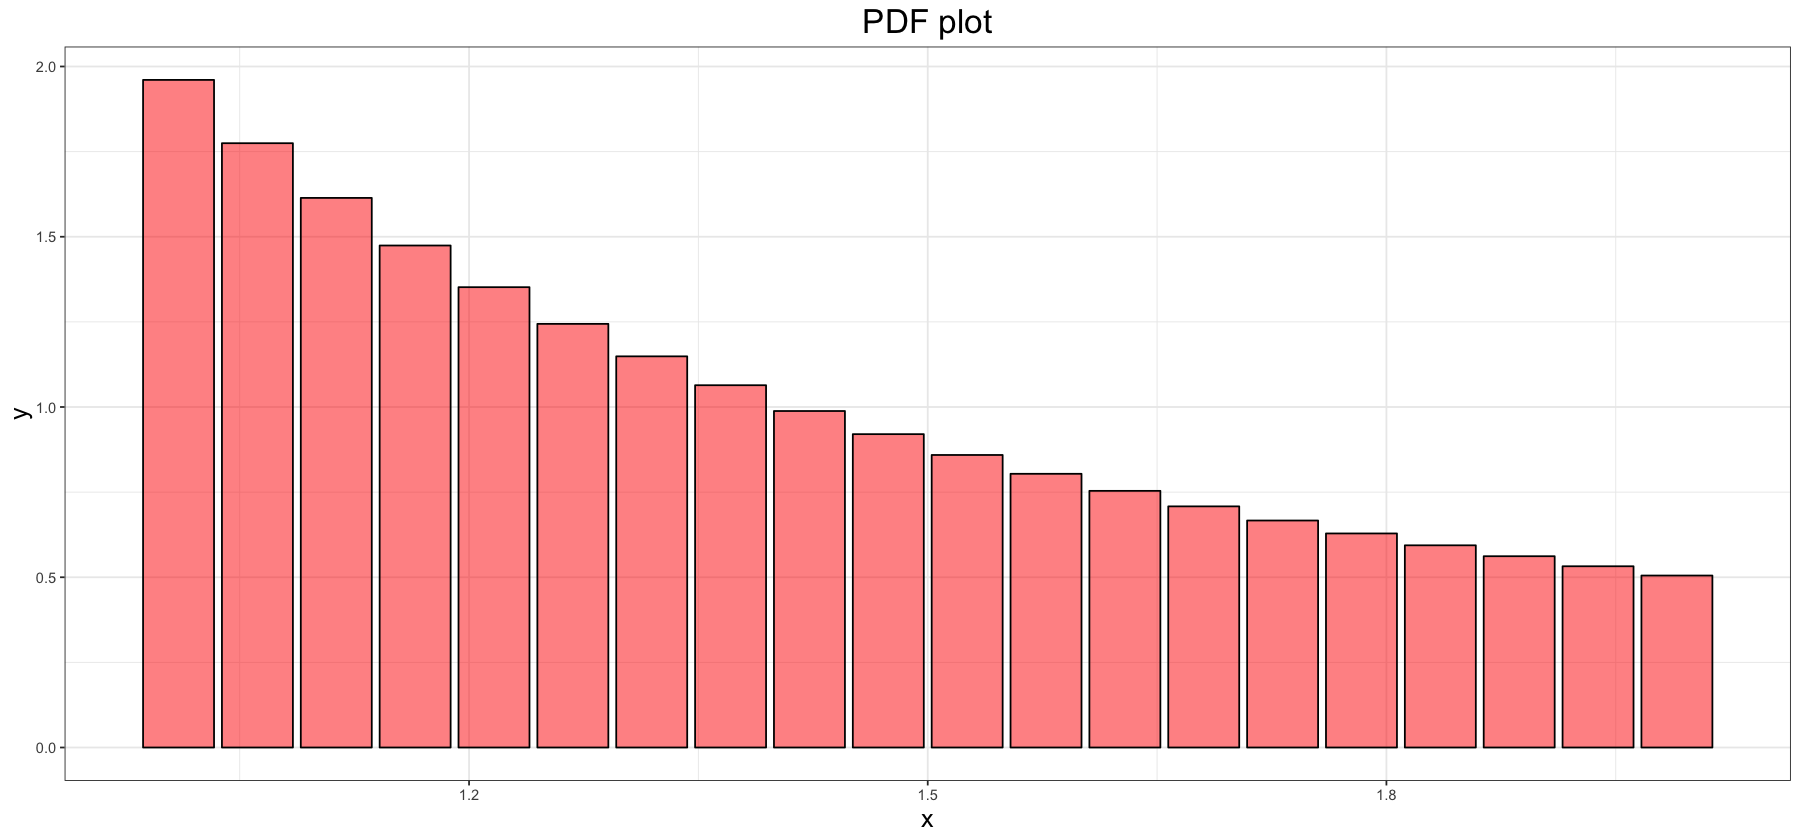

In [36]:
options(repr.plot.width=15, repr.plot.height=7)
x_axis <- seq(1.01, 1.99, length = 20)
plot <- ggplot()
plot <- plot + theme_bw()
plot <- plot + ggtitle('PDF plot') + ylab('y') + xlab('x')
plot <- plot + theme(plot.title = element_text(size=20, hjust=0.5))
plot <- plot + theme(axis.title = element_text(size=15, hjust=0.5))
plot + geom_bar(aes(x_axis, dcustom_2(x_axis)), stat='identity', fill='red', alpha=0.5, color='black')

**Superimposing the analytical distribution to n sampled points to verify the definition of the sampling function**

Warning message:
“Removed 2 rows containing missing values (geom_bar).”

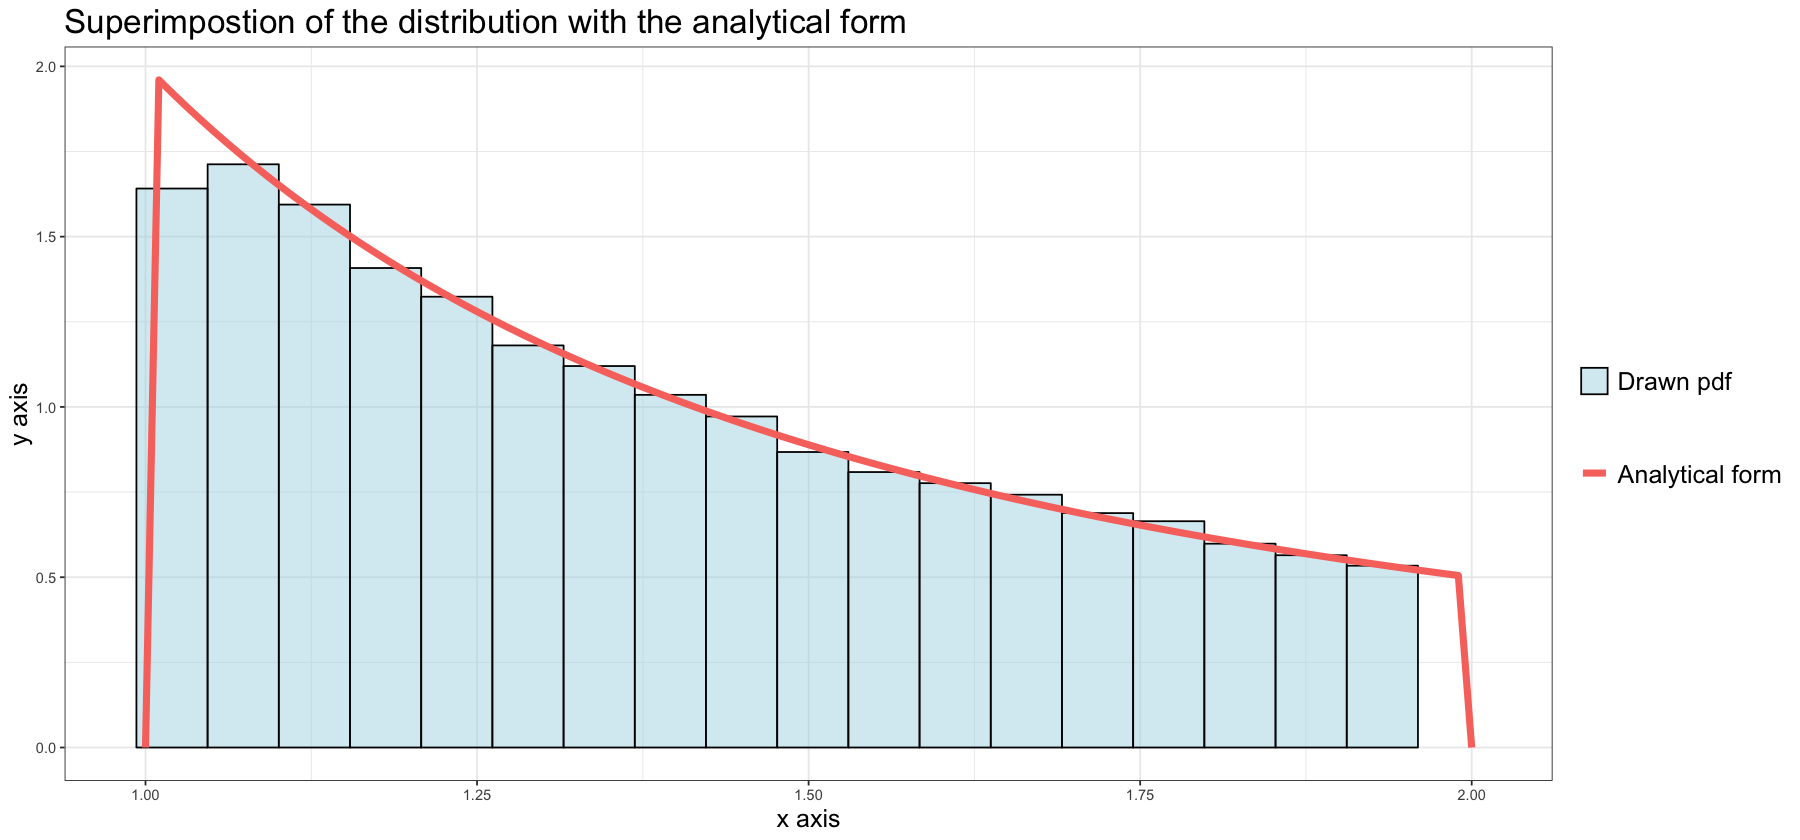

In [37]:
n_samples <- 10^5
samples <- rcustom_2(0:n_samples)
x_axis <- seq(1, 2, length= 100)
imp_plot <- ggplot() +
            geom_histogram(aes(x=samples,y=..density.., fill = 'Drawn pdf'), bins=20,  alpha=0.5, color='black') +
            scale_fill_manual(values = "lightblue", name = "") + 
            xlim(0.99, 2.01) +
            ggtitle('Superimpostion of the distribution with the analytical form') +
            ylab('y axis') +
            xlab('x axis') +
            theme_bw() +
            theme(axis.title = element_text(size=15)) +
            theme(plot.title = element_text(size=20)) +
            geom_line(aes(x=x_axis, y= func_2(x_axis), color='Analytical form'), lwd=2) +
            theme(legend.text=element_text(size=15)) + 
            labs(colour = "")
            
imp_plot


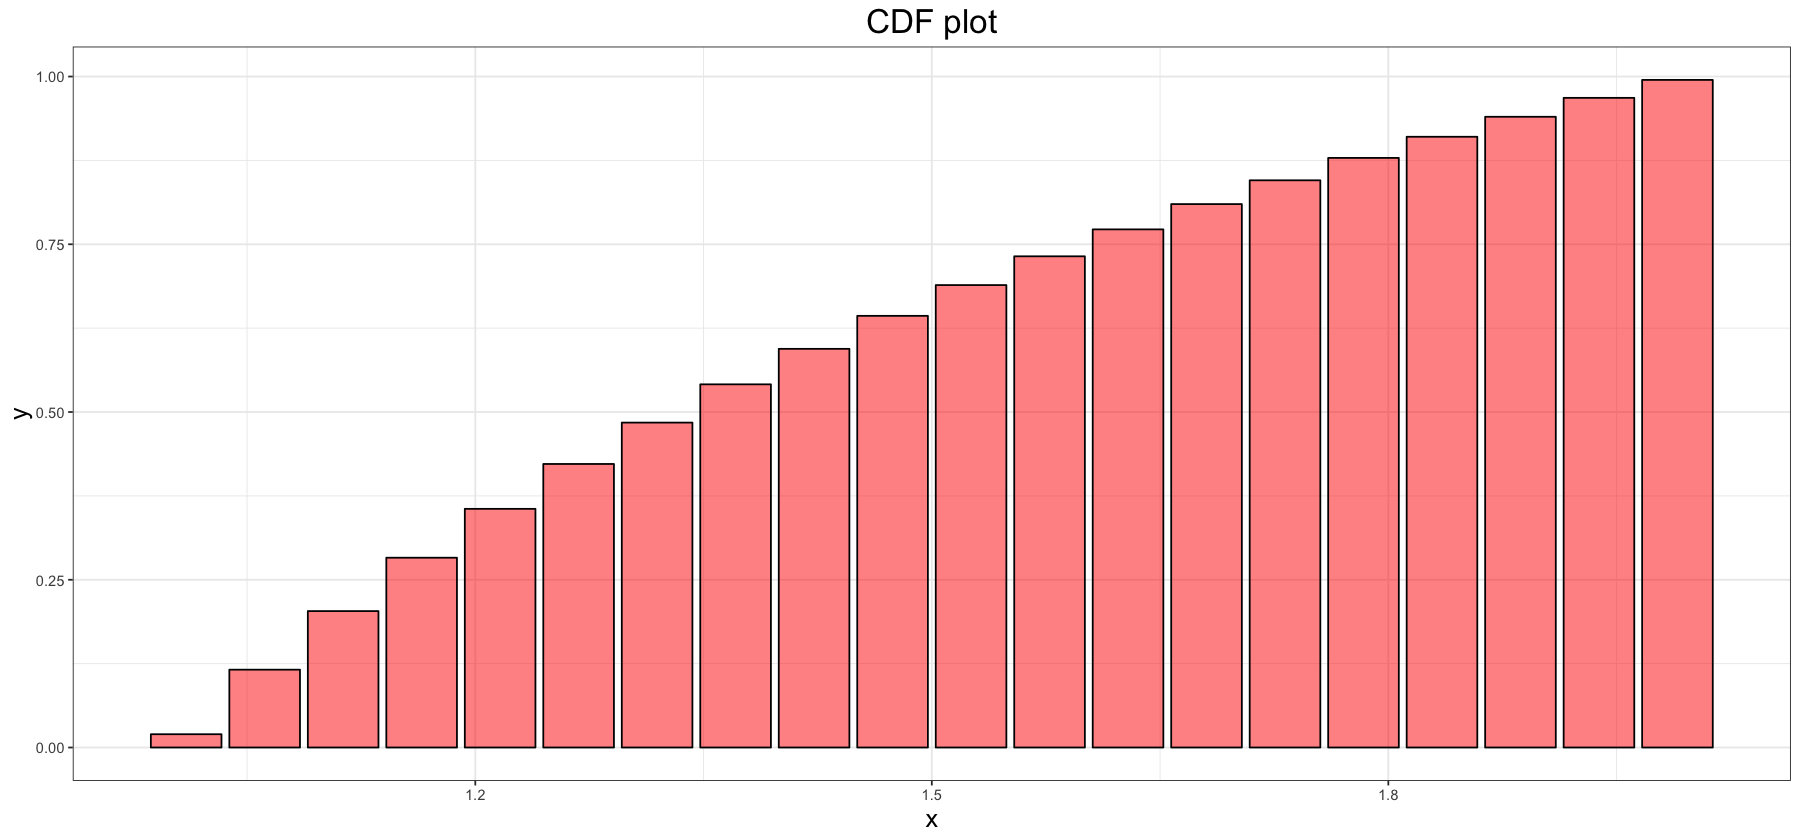

In [38]:
## options(repr.plot.width=15, repr.plot.height=7)
x_axis <- seq(1.01, 1.99, length = 20)
plot <- ggplot()
plot <- plot + theme_bw()
plot <- plot + ggtitle('CDF plot') + ylab('y') + xlab('x')
plot <- plot + theme(plot.title = element_text(size=20, hjust=0.5))
plot <- plot + theme(axis.title = element_text(size=15, hjust=0.5))
plot + geom_bar(aes(x_axis, pcustom_2(x_axis)), stat='identity', fill='red', alpha=0.5, color='black')

In [39]:
prob_1 <- integrate(func_2, lower = 1, upper = 15000/10^4)
cat(paste('The probability that the tire lasts less than 15000 km is: ', round(prob_1$value, 4)))

The probability that the tire lasts less than 15000 km is:  0.6667

In [40]:
n_samples <- 3000
samples <- rcustom_2(n_samples)
samples <- samples*10^4

In [41]:
#We compute the average with the definition to then use it in the computation of the average
average <- sum(samples)/n_samples
average_distr <- sum(samples/10**4)/n_samples
cat(paste('The average of the tires lifetime is:', round(average,4), 'km\n'))
cat('The average of the distribution is ', average_distr)

The average of the tires lifetime is: 13855.0825 km
The average of the distribution is  1.385508

In [42]:
var_1 <- sum(samples^2)/n_samples
var_2 <- average

var_1_distr <- sum((samples/10**4)^2)/n_samples
var_2_distr <- average_distr

var = round(var_1-var_2^2,4)
var_distr = round(var_1_distr-var_2_distr^2,4)

cat(paste('The variance is of: ',var, 'km^2\n'))
cat(paste('The variance of the distribution is: ',var_distr))

The variance is of:  7554900.7961 km^2
The variance of the distribution is:  0.0755

In [43]:
cat(paste('We can estimate the lifetime of the tires as', round(average,0),'km', '+-', round(sqrt(round(var,4)),0),'km'))

We can estimate the lifetime of the tires as 13855 km +- 2749 km